# Import Library

In [3]:
# 📊 Data Manipulation & EDA
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🧹 Warnings
import warnings
warnings.filterwarnings('ignore')

# ⚙️ Machine Learning: Baseline & Gradient Boosting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve
)

# 📏 Score Scaling
from sklearn.preprocessing import MinMaxScaler

# 🔍 SHAP Explainability
import shap

# 📄 Save PNG & PDF
import matplotlib
from matplotlib import pyplot as plt

# Load Dataset

In [9]:
dataset = pd.read_csv("E:\Coding\PEFindo\data\credit_scoring.csv")

In [30]:
dataset.sample(5)

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
1431,502431,30,3031725,9225673,1,584,0,0,-0.004
3872,504872,43,5830344,7541151,0,847,0,0,-0.022
3779,504779,59,7628370,14466925,0,369,0,0,0.059
5496,506496,33,5597734,2571128,0,807,0,0,0.008
5106,506106,42,19640843,9021317,0,536,0,0,0.012


# Data Pre-Preparation

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     6000 non-null   int64  
 1   age                6000 non-null   int64  
 2   monthly_income     6000 non-null   int64  
 3   loan_amount        6000 non-null   int64  
 4   previous_defaults  6000 non-null   int64  
 5   credit_score       6000 non-null   int64  
 6   default            6000 non-null   int64  
 7   leak_col_good      6000 non-null   int64  
 8   leak_col_subtle    6000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


In [14]:
# Check for duplicate rows using len
has_duplicate_rows = len(dataset) != len(dataset.drop_duplicates())
print("Has duplicate rows:", has_duplicate_rows)

Has duplicate rows: False


Tidak ada Duplicate Rows

In [15]:
# Check if there are any nulls in the dataset
has_nulls = dataset.isnull().values.any()
print("Has missing values:", has_nulls)

Has missing values: False


Tidak ada Missing Value

In [16]:
dataset.describe()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
count,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,503999.500000,40.321500,1.140386e+07,8.001122e+06,0.243667,575.979833,0.012167,0.012167,0.011945
std,1732.195139,11.300697,4.912598e+06,4.071786e+06,0.484767,158.328931,0.109639,0.109639,0.113947
min,501000.000000,21.000000,3.000310e+06,1.000794e+06,0.000000,300.000000,0.000000,0.000000,-0.119000
25%,502499.750000,31.000000,7.163379e+06,4.440939e+06,0.000000,438.750000,0.000000,0.000000,-0.020000
50%,503999.500000,41.000000,1.129945e+07,7.982304e+06,0.000000,577.500000,0.000000,0.000000,0.000000
75%,505499.250000,50.000000,1.573705e+07,1.153144e+07,0.000000,713.000000,0.000000,0.000000,0.021000
max,506999.000000,59.000000,1.998622e+07,1.499858e+07,3.000000,849.000000,1.000000,1.000000,1.092000


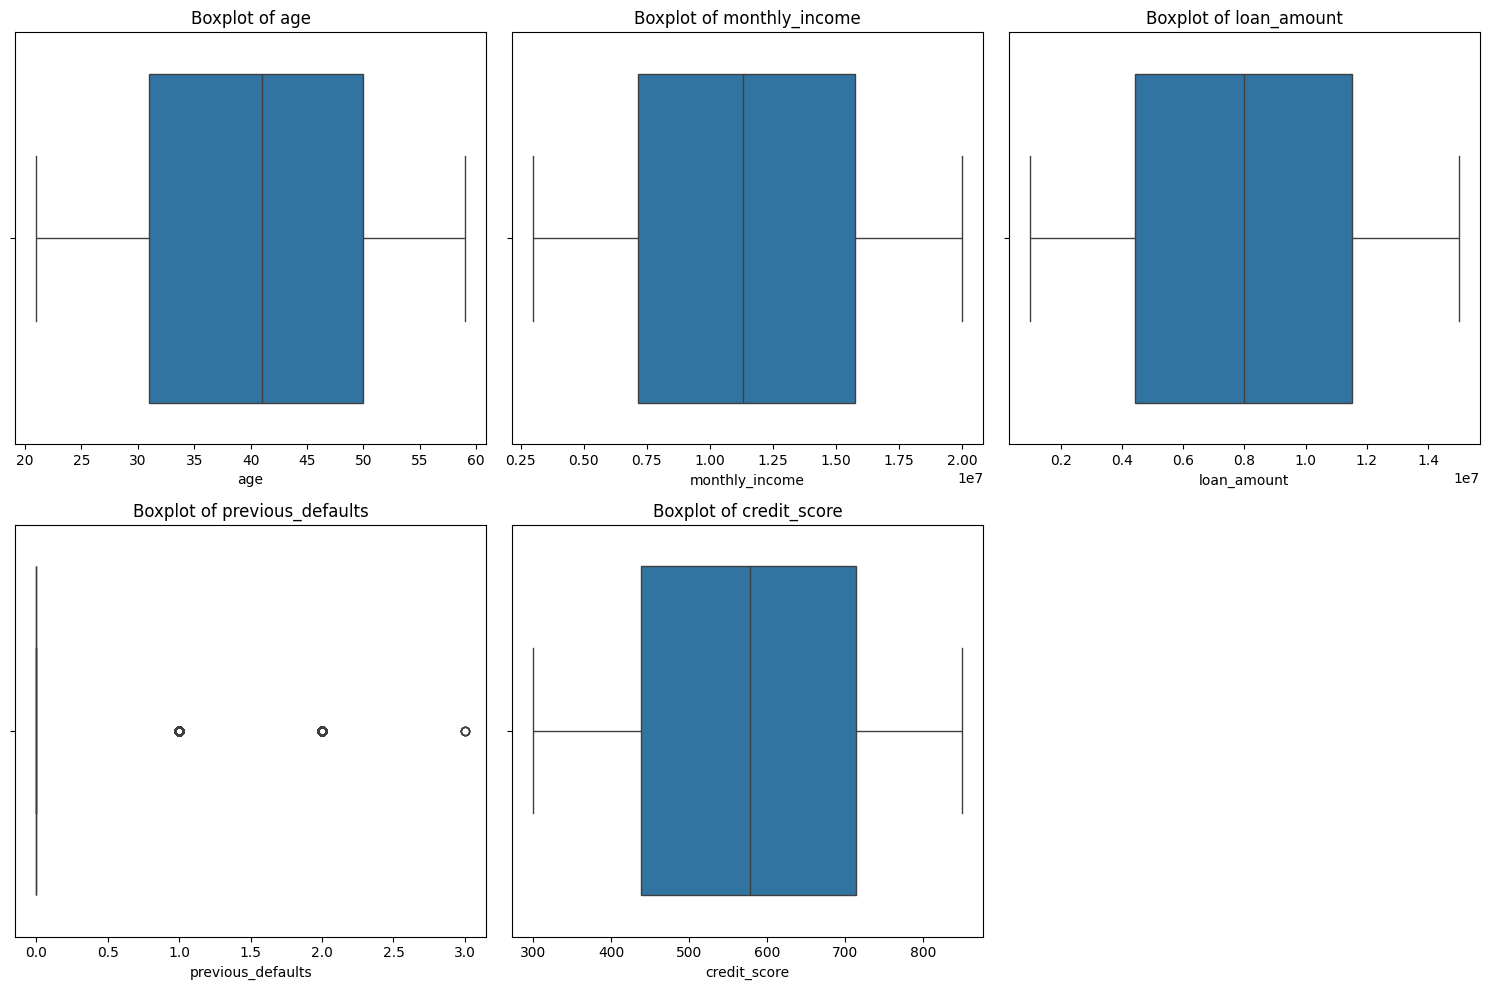

In [18]:
numeric_cols = ['age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Karena tidak terlihat adanya Extreme Outlier, maka tidak dilakukan Outlier Handling.

In [31]:
# Karena Data Leakage (Fitur yang membocorkan hasil target) dapat terjadi oleh kedua fitur ini, kita drop kedua fitur tersebut.

df = dataset.drop(['leak_col_good', 'leak_col_subtle'], axis=1)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   application_id     6000 non-null   int64
 1   age                6000 non-null   int64
 2   monthly_income     6000 non-null   int64
 3   loan_amount        6000 non-null   int64
 4   previous_defaults  6000 non-null   int64
 5   credit_score       6000 non-null   int64
 6   default            6000 non-null   int64
dtypes: int64(7)
memory usage: 328.3 KB


# Exploratory Data Analysis

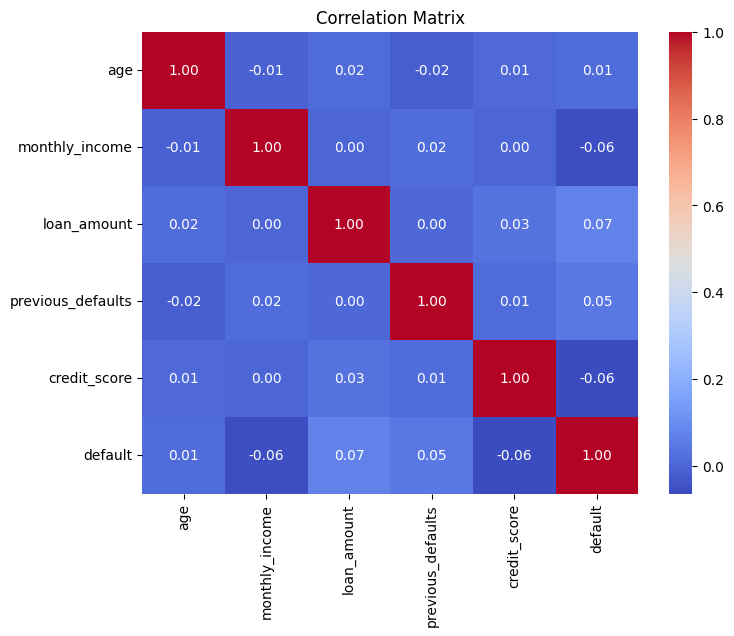

In [36]:

corr = df.drop('application_id', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


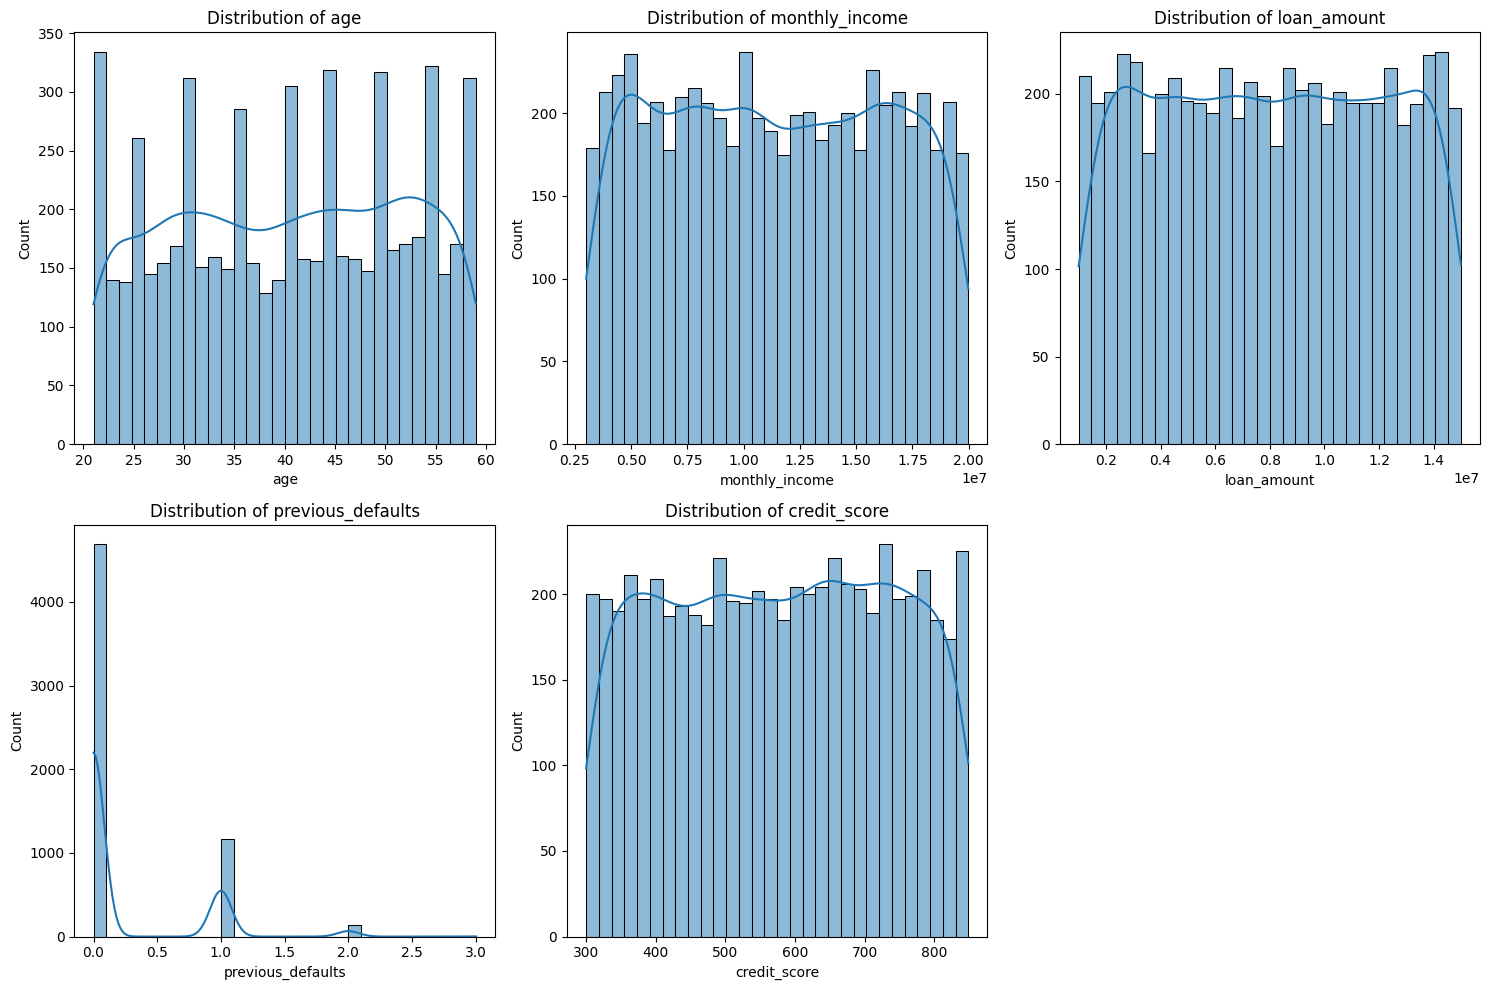

In [34]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


default
0    5927
1      73
Name: count, dtype: int64


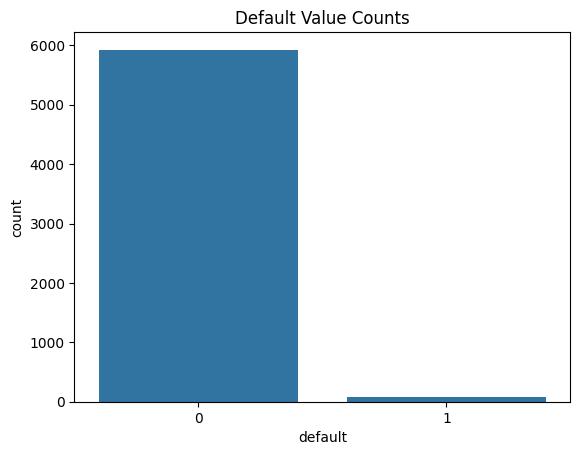

In [40]:
# Value counts
print(df['default'].value_counts())

# Plot
sns.countplot(x='default', data=df)
plt.title('Default Value Counts')
plt.show()

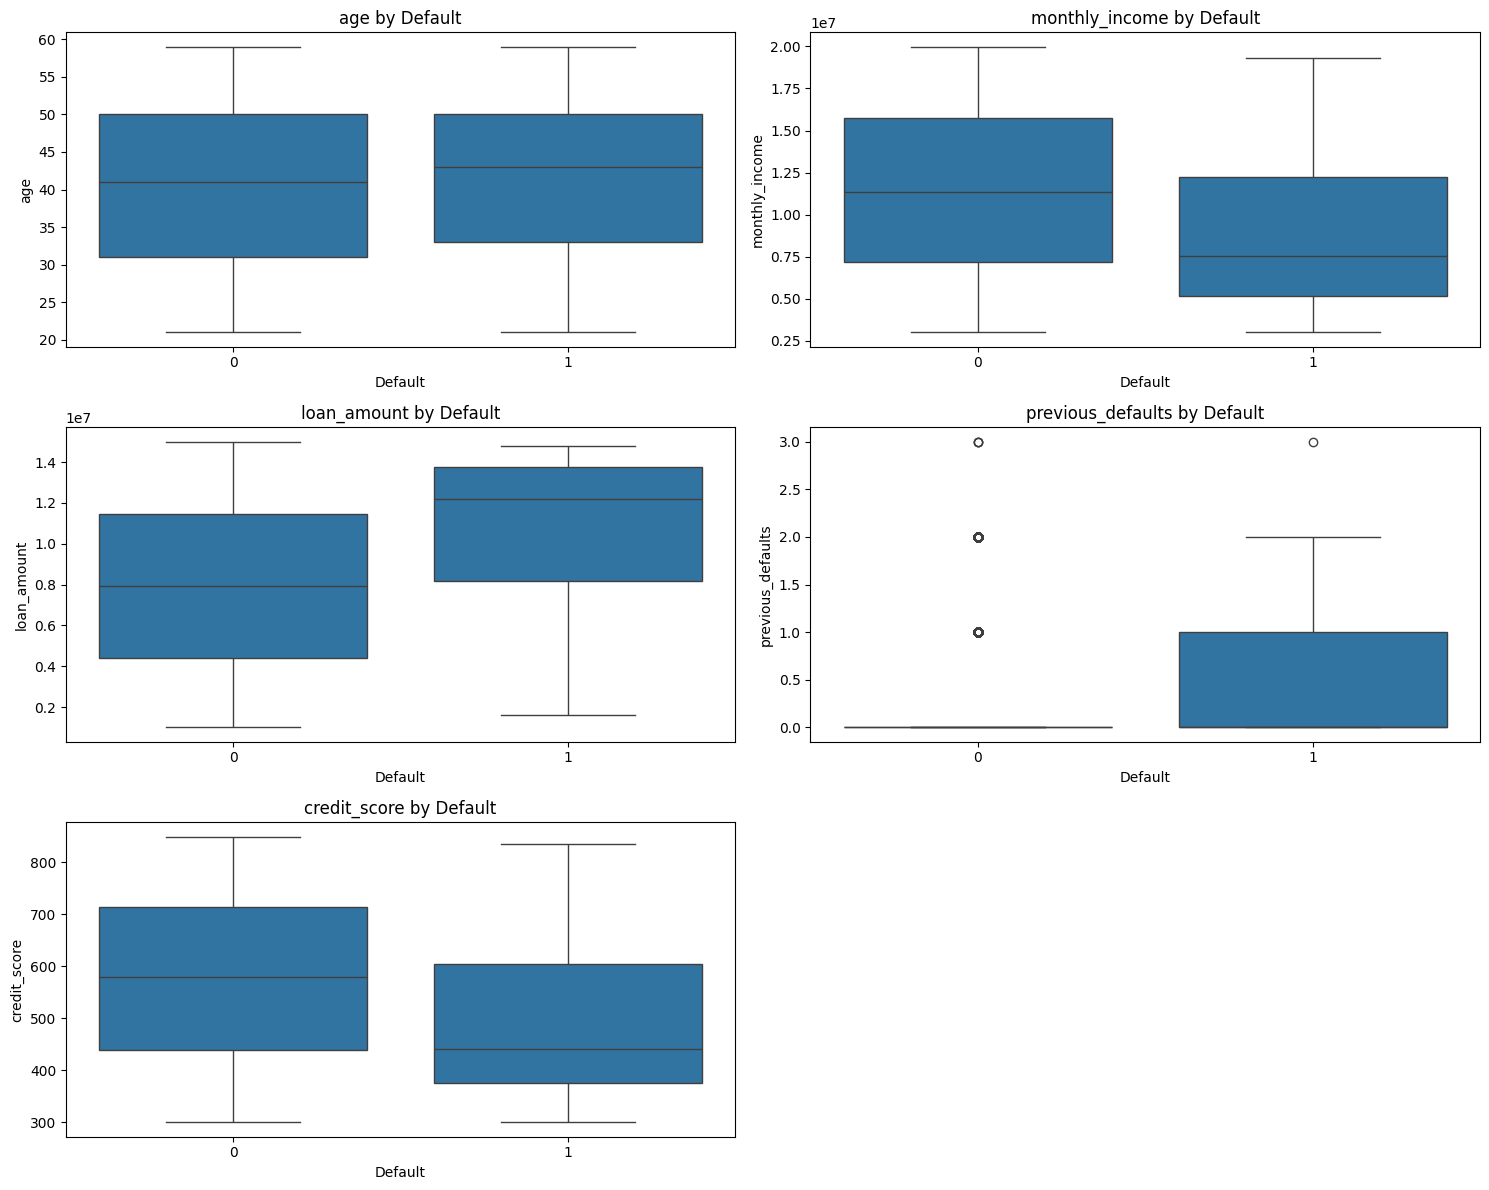

In [37]:

numeric_cols = ['age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score']

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f'{col} by Default')
    plt.xlabel('Default')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
# Drop ID Karena tidak digunakan dalam Modeling
df = df.drop(["application_id"], axis=1)

# Splitting 

In [44]:
df.head()

,age,monthly_income,loan_amount,previous_defaults,credit_score,default
0,41,13995609,5982664,0,624,0
1,58,13683833,3711198,0,809,0
2,33,9417391,7172332,0,647,0
3,45,6861811,8661056,0,450,0
4,22,5640742,4520669,1,816,0


In [45]:
# Drop NaN values from both X and y simultaneously
df_ready = df.dropna(subset=['default'])  # Drop rows with NaN in the target column
X = df_ready.drop(['default'], axis=1)         # Drop the 'default' column from the dataset to get features
y = df_ready['default']                        # Extract 'default' as the target variable

# Now, X and y should have the same number of samples
print(X.shape)
print(y.shape)


(6000, 5)
(6000,)


In [46]:
from sklearn.model_selection import train_test_split
# First, split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
X_train.head()

,age,monthly_income,loan_amount,previous_defaults,credit_score
3897,40,11472284,8369155,0,321
5628,40,15284117,12791450,1,821
1756,34,15453846,13234338,0,705
2346,37,5810685,7980815,0,737
2996,44,19968298,4921501,0,374


## Multicollinearity Study

In [51]:
# Calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

In [52]:
# Filter only numeric columns
df_train_numeric = X_train.select_dtypes(include=['number'])

# Drop columns with NaN or inf values
df_train_numeric = df_train_numeric.replace([np.inf, -np.inf], np.nan)
df_train_numeric = df_train_numeric.dropna(axis=1)

# Add a constant
X = add_constant(df_train_numeric)

# Calculate VIF
vif_scores = pd.DataFrame({
    'Feature': X.columns,
    'VIF_score': [vif(X.values, i) for i in range(X.shape[1])]
})

# Remove the constant column from results
vif_scores = vif_scores[vif_scores['Feature'] != 'const']

vif_scores.sort_values(by='VIF_score', ascending=False)

,Feature,VIF_score
4,previous_defaults,1.001166
5,credit_score,1.000888
2,monthly_income,1.000691
3,loan_amount,1.000655
1,age,1.000210


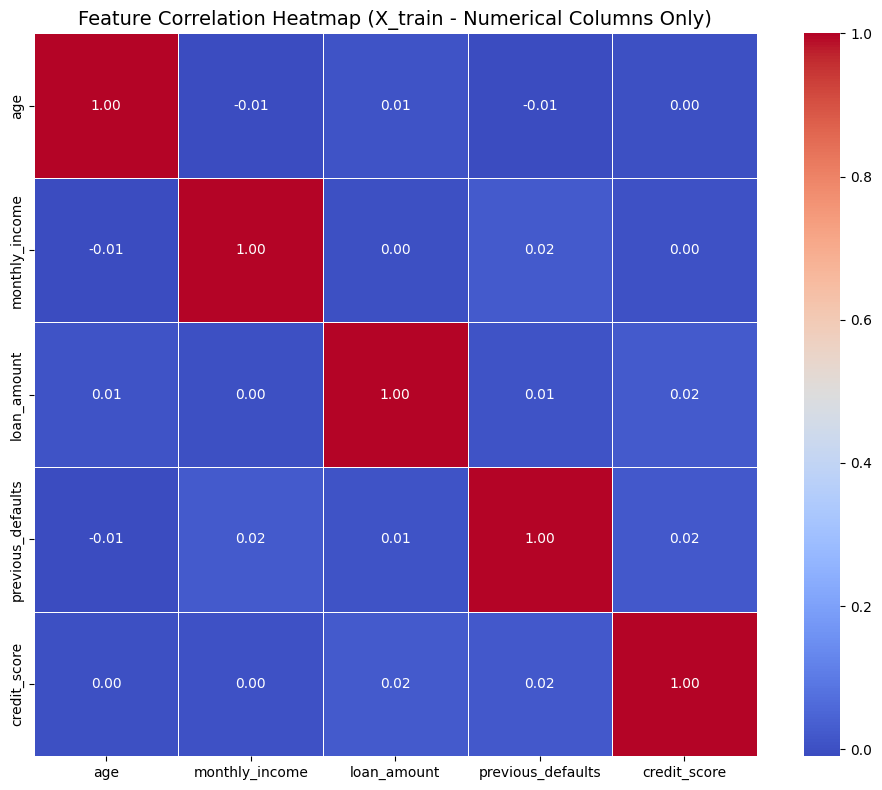

In [53]:
X_train_numeric = X_train.select_dtypes(include='number')

# Compute the correlation matrix for only numerical columns
corr_matrix = X_train_numeric.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap (X_train - Numerical Columns Only)", fontsize=14)
plt.tight_layout()
plt.show()

Tidak ada Multikolinearitas

## Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

# 1. numeric columns
numeric_cols = ['age', 'monthly_income', 'loan_amount', 'credit_score']
# 'previous_defaults' can be left as is

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit on training data, transform both train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [50]:
X_train_scaled.head()

,age,monthly_income,loan_amount,previous_defaults,credit_score
3897,-0.024122,0.002349,0.096759,0,-1.612533
5628,-0.024122,0.779207,1.184729,1,1.556458
1756,-0.554837,0.813798,1.293688,0,0.821252
2346,-0.289479,-1.151493,0.001220,0,1.024067
2996,0.329689,1.733850,-0.751430,0,-1.276620


# Model

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# 1) Initialize Logistic Regression
logreg = LogisticRegression(random_state=42)

In [55]:
# 2) Fit on scaled training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [59]:
# ✅ Predict on TRAINING data
y_train_pred = logreg.predict(X_train_scaled)
y_train_prob = logreg.predict_proba(X_train_scaled)[:, 1]

# ✅ Evaluate TRAINING performance
print("=== TRAINING PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))


=== TRAINING PERFORMANCE ===
Accuracy: 0.988125
ROC AUC: 0.7922996400975028
Confusion Matrix:
 [[4743    0]
 [  57    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4743
           1       0.00      0.00      0.00        57

    accuracy                           0.99      4800
   macro avg       0.49      0.50      0.50      4800
weighted avg       0.98      0.99      0.98      4800



In [60]:
# ✅ Predict on TEST data
y_test_pred = logreg.predict(X_test_scaled)
y_test_prob = logreg.predict_proba(X_test_scaled)[:, 1]

print("\n=== TEST PERFORMANCE ===")
# ✅ Evaluate TEST performance
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


=== TEST PERFORMANCE ===
Accuracy: 0.9866666666666667
ROC AUC: 0.8082242398648649
Confusion Matrix:
 [[1184    0]
 [  16    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1184
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.97      0.99      0.98      1200



# GradentBoost Regressor Model

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize with default hyperparameters
gbc = GradientBoostingClassifier(random_state=42)


In [62]:
# Fit on training data
gbc.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# TRAIN
y_train_pred_gbc = gbc.predict(X_train_scaled)
y_train_prob_gbc = gbc.predict_proba(X_train_scaled)[:, 1]

# TRAIN metrics
print("=== Gradient Boosting: TRAIN ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred_gbc))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_gbc))
print("Classification Report:\n", classification_report(y_train, y_train_pred_gbc))


=== Gradient Boosting: TRAIN ===
Accuracy: 0.9958333333333333
ROC AUC: 0.9762530932010609
Confusion Matrix:
 [[4742    1]
 [  19   38]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4743
           1       0.97      0.67      0.79        57

    accuracy                           1.00      4800
   macro avg       0.99      0.83      0.89      4800
weighted avg       1.00      1.00      1.00      4800



In [64]:
# TEST
y_test_pred_gbc = gbc.predict(X_test_scaled)
y_test_prob_gbc = gbc.predict_proba(X_test_scaled)[:, 1]

print("\n=== Gradient Boosting: TEST ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_gbc))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_gbc))
print("Classification Report:\n", classification_report(y_test, y_test_pred_gbc))


=== Gradient Boosting: TEST ===
Accuracy: 0.9825
ROC AUC: 0.7037848395270271
Confusion Matrix:
 [[1178    6]
 [  15    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1184
           1       0.14      0.06      0.09        16

    accuracy                           0.98      1200
   macro avg       0.57      0.53      0.54      1200
weighted avg       0.98      0.98      0.98      1200



# With SMOTE due to Class Imbalance

## Logistic Regression

In [65]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply ONLY on training data
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())


Before SMOTE: default
0    4743
1      57
Name: count, dtype: int64
After SMOTE: default
0    4743
1    4743
Name: count, dtype: int64


In [66]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logreg_smote = LogisticRegression(random_state=42)

# Fit on balanced training data
logreg_smote.fit(X_train_bal, y_train_bal)


LogisticRegression(random_state=42)

In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Predict on balanced TRAIN data
y_train_pred_smote = logreg_smote.predict(X_train_bal)
y_train_prob_smote = logreg_smote.predict_proba(X_train_bal)[:, 1]

print("=== SMOTE Logistic Regression: TRAIN ===")
print("Accuracy:", accuracy_score(y_train_bal, y_train_pred_smote))
print("ROC AUC:", roc_auc_score(y_train_bal, y_train_prob_smote))
print("Confusion Matrix:\n", confusion_matrix(y_train_bal, y_train_pred_smote))
print("Classification Report:\n", classification_report(y_train_bal, y_train_pred_smote))



=== SMOTE Logistic Regression: TRAIN ===
Accuracy: 0.7343453510436433
ROC AUC: 0.8008189793683327
Confusion Matrix:
 [[3381 1362]
 [1158 3585]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      4743
           1       0.72      0.76      0.74      4743

    accuracy                           0.73      9486
   macro avg       0.73      0.73      0.73      9486
weighted avg       0.73      0.73      0.73      9486



In [68]:
# Predict on TEST data
y_test_pred_smote = logreg_smote.predict(X_test_scaled)
y_test_prob_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]

print("\n=== SMOTE Logistic Regression: TEST ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_smote))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_test_pred_smote))



=== SMOTE Logistic Regression: TEST ===
Accuracy: 0.6816666666666666
ROC AUC: 0.8299197635135135
Confusion Matrix:
 [[806 378]
 [  4  12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81      1184
           1       0.03      0.75      0.06        16

    accuracy                           0.68      1200
   macro avg       0.51      0.72      0.43      1200
weighted avg       0.98      0.68      0.80      1200



## GradientBoost with SMOTE

In [69]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())


Before SMOTE: default
0    4743
1      57
Name: count, dtype: int64
After SMOTE: default
0    4743
1    4743
Name: count, dtype: int64


In [70]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gbc_smote = GradientBoostingClassifier(random_state=42)

# Fit on SMOTE-resampled training data
gbc_smote.fit(X_train_bal, y_train_bal)


GradientBoostingClassifier(random_state=42)

In [71]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# TRAIN 
y_train_pred_gbc_smote = gbc_smote.predict(X_train_bal)
y_train_prob_gbc_smote = gbc_smote.predict_proba(X_train_bal)[:, 1]

print("=== Gradient Boosting with SMOTE: TRAIN ===")
print("Accuracy:", accuracy_score(y_train_bal, y_train_pred_gbc_smote))
print("ROC AUC:", roc_auc_score(y_train_bal, y_train_prob_gbc_smote))
print("Confusion Matrix:\n", confusion_matrix(y_train_bal, y_train_pred_gbc_smote))
print("Classification Report:\n", classification_report(y_train_bal, y_train_pred_gbc_smote))


=== Gradient Boosting with SMOTE: TRAIN ===
Accuracy: 0.8888888888888888
ROC AUC: 0.9535806932141729
Confusion Matrix:
 [[4058  685]
 [ 369 4374]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      4743
           1       0.86      0.92      0.89      4743

    accuracy                           0.89      9486
   macro avg       0.89      0.89      0.89      9486
weighted avg       0.89      0.89      0.89      9486



In [72]:
# TEST 
y_test_pred_gbc_smote = gbc_smote.predict(X_test_scaled)
y_test_prob_gbc_smote = gbc_smote.predict_proba(X_test_scaled)[:, 1]

print("\n=== Gradient Boosting with SMOTE: TEST ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_gbc_smote))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob_gbc_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_gbc_smote))
print("Classification Report:\n", classification_report(y_test, y_test_pred_gbc_smote))


=== Gradient Boosting with SMOTE: TEST ===
Accuracy: 0.8266666666666667
ROC AUC: 0.6825907939189189
Confusion Matrix:
 [[986 198]
 [ 10   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      1184
           1       0.03      0.38      0.05        16

    accuracy                           0.83      1200
   macro avg       0.51      0.60      0.48      1200
weighted avg       0.98      0.83      0.89      1200



# Evaluation

| Model | Test Accuracy | Test ROC AUC |
|------------------------------------|----------------|---------------|
| Logistic Regression (no SMOTE)     | 0.987 | 0.808 |
| SMOTE Logistic Regression           | 0.682 | 0.830 |
| Gradient Boosting (no SMOTE)        | 0.983 | 0.704 |
| SMOTE Gradient Boosting             | 0.827 | 0.683 |


# Scoreboard Scaling

In [73]:
def scorecard(prob, min_score=300, max_score=850):
    """
    Convert predicted default probability to a credit score on a scale of 300–850.
    Higher probability of default → lower score.
    Lower probability of default → higher score."""
    
    return min_score + (1 - prob) * (max_score - min_score)


In [ ]:
# Contoh penggunaan
y_test_prob_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]
scores_smote = scorecard(y_test_prob_smote)

print(scores_smote[:10])


[370.22839518 771.81388    484.77458316 455.12044901 810.19842224
 728.62399395 615.88195011 505.76995272 828.76300408 684.3078402 ]


# SHAP

shap_values shape: (1200, 5)


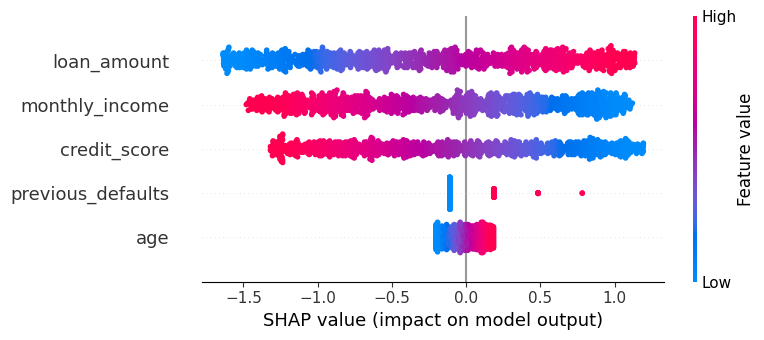

In [ ]:
import shap
import pandas as pd

# Make sure DataFrames have the same columns
X_train_bal_df = pd.DataFrame(X_train_bal, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Use LinearExplainer for Logistic Regression
explainer = shap.LinearExplainer(logreg_smote, X_train_bal_df)

# Get SHAP values for test data
shap_values = explainer.shap_values(X_test_scaled_df)

print("shap_values shape:", shap_values.shape)  

# Plot
shap.summary_plot(shap_values, X_test_scaled_df)


Nilai Positif SHAP = Mendorong Prediksi menuju 1 atau lebih mungkin untuk Default (Tidak Bayar)

Nilai Negatif = Mendorong Prediksi menuju 0 atau kurang mungkin untuk Default 

Persebaran Dot makin lebar maka makin mempengaruhi Prediksi

Terlihat bahwa 
- Loan yang kecil cenderung  mengurangi kemungkinan Default, namun Loan yang besar dapat mempengaruhi baik mengurangi maupun meningkatkan kemunginan Default

- Monthly Income -> Mengurangi kemungkinan Default jika pendapatan tinggi, dan menambah kemungkinan Default jika pendapatan rendah

- Semakin Tinggi Credit Score pengguna juga makin mengurangi kemungkinan mereka Default

- Semakin banyak historis mereka Default, maka makin besar kemungkinan mereka untuk Default lagi

- Semakin tua Age seseorang, makin mengurangi kemungkinan mereka untuk Default

